In [0]:
#Description: This program detects breast cncer, based off of data

In [0]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#load the data
from google.colab import files
uploaded = files.upload()
df = pd.read_csv('data.csv')
df.head(7)

In [0]:
df.shape

In [0]:
#Drop the column with all missing values
df=df.dropna(axis=1)

In [0]:
df.shape

In [0]:
df['diagnosis'].value_counts()

In [0]:
#Visualize the count
sns.countplot(df['diagnosis'], label='count')

In [0]:
#Check the data type
df.dtypes

In [0]:
#Encode the data categories data values
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1] = labelencoder_Y.fit_transform(df.iloc[:,1].values)

In [0]:
#Create a pair plot
sns.pairplot(df.iloc[:,1:5], hue='diagnosis')

In [21]:
#Get the correelation of the columns
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


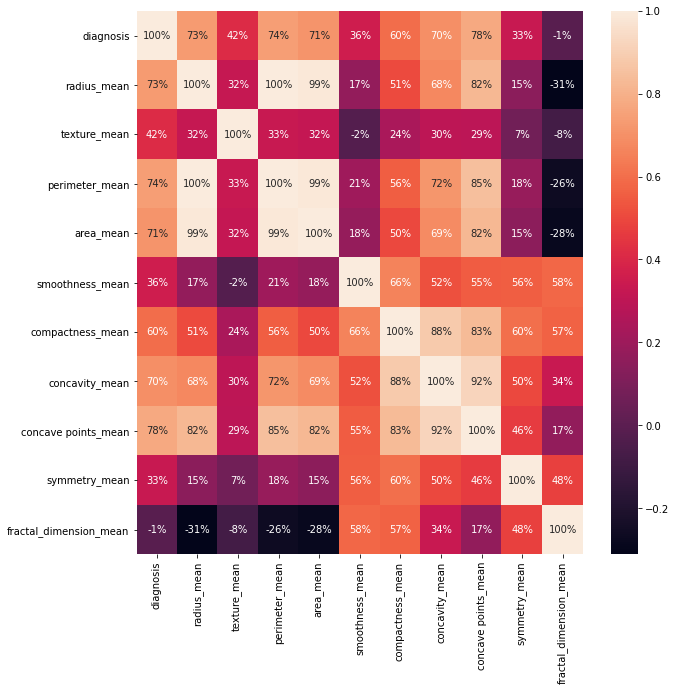

In [22]:
#Visualize the correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.iloc[:,1:12].corr(), annot=True , fmt='.0%')

In [0]:
 X = df.iloc[:,2:31].values
 Y = df.iloc[:,1].values


In [47]:
#Split the data set in to 75% training and 25% testing
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.25, random_state = 0)

array([[1.185e+01, 1.746e+01, 7.554e+01, ..., 1.316e-01, 9.140e-02,
        3.101e-01],
       [1.122e+01, 1.986e+01, 7.194e+01, ..., 1.335e-02, 2.022e-02,
        3.292e-01],
       [2.013e+01, 2.825e+01, 1.312e+02, ..., 3.215e-01, 1.628e-01,
        2.572e-01],
       ...,
       [9.436e+00, 1.832e+01, 5.982e+01, ..., 1.144e-01, 5.052e-02,
        2.454e-01],
       [9.720e+00, 1.822e+01, 6.073e+01, ..., 0.000e+00, 0.000e+00,
        1.909e-01],
       [1.151e+01, 2.393e+01, 7.452e+01, ..., 3.630e-01, 9.653e-02,
        2.112e-01]])

In [0]:
#Scale the data (Feature scaling)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)



In [0]:
#Create a function for the models
def models(X_train,Y_train):
  
  #Logistic Regression
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state=0)
  log.fit(X_train,Y_train)

  #Decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree= DecisionTreeClassifier(criterion = 'entropy', random_state=0)
  tree.fit(X_train,Y_train)

  #Random Forest Classifier
  from sklearn.ensemble import RandomForestClassifier
  forest  = RandomForestClassifier(n_estimators= 10, criterion = 'entropy', random_state=0)
  forest.fit(X_train,Y_train)

  #Print the modles accuracy on the training data
  print('[0]Logistic Regression Training Accuracy:' , log.score(X_train,Y_train))
  print('[1]Decision Tree Training Accuracy:' , tree.score(X_train,Y_train))
  print('[2]Random Forest Training Accuracy:' , forest.score(X_train,Y_train))

  return log,tree, forest

In [31]:
#Getting all of the models
models = models(X_train,Y_train)

[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]Decision Tree Training Accuracy: 1.0
[2]Random Forest Training Accuracy: 0.9953051643192489


In [39]:
#Test models accuracy on test data on confution matrix
from sklearn.metrics import confusion_matrix

for i in range( len(models) ):
  print('Model',i)
  cm  =confusion_matrix(Y_test,models[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

  print(cm)
  print('Testing Accuracy =', (TP+TN)/(TP+TN+FN+FP))

Model 0
[[86  4]
 [ 3 50]]
Testing Accuracy = 0.951048951048951
Model 1
[[83  7]
 [ 2 51]]
Testing Accuracy = 0.9370629370629371
Model 2
[[87  3]
 [ 2 51]]
Testing Accuracy = 0.965034965034965


In [43]:
#Show another way to get matrics of the modles
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(models) ):
  print('Model',i)
  print( classification_report(Y_test,models[i].predict(X_test)))
  print (accuracy_score(Y_test,models[i].predict(X_test)))
  print()

Model 0
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        90
           1       0.93      0.94      0.93        53

    accuracy                           0.95       143
   macro avg       0.95      0.95      0.95       143
weighted avg       0.95      0.95      0.95       143

0.951048951048951

Model 1
              precision    recall  f1-score   support

           0       0.98      0.92      0.95        90
           1       0.88      0.96      0.92        53

    accuracy                           0.94       143
   macro avg       0.93      0.94      0.93       143
weighted avg       0.94      0.94      0.94       143

0.9370629370629371

Model 2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted av

In [44]:
#Print the prediction of Random Forest Classifier MOdel
pred = models[2].predict(X_test)
print(pred)
print()
print(Y_test)

[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
